### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split # функция разделения массива данных на тренировочные и тестовые


from sklearn.preprocessing import StandardScaler #класс для стандартизации признаков
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

from sklearn.datasets import load_boston #загрузка DataSet Boston

In [251]:
boston = load_boston()

In [252]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['target'])

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston.feature_names)

In [255]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [256]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

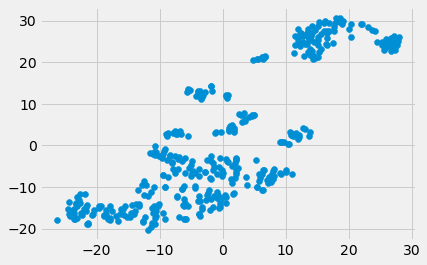

In [257]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

Cluster - 0 AVG Price: 24.05 CRIM: 2.859
Cluster - 1 AVG Price: 24.07 CRIM: 1.481
Cluster - 2 AVG Price: 24.71 CRIM: 1.719


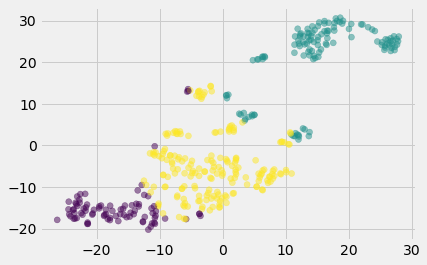

In [258]:
KM_model = KMeans(n_clusters=3, random_state=42, max_iter=100)
X_train_lables = KM_model.fit_predict(X_train_scaled)
X_train = pd.concat([X_train, pd.DataFrame(X_train_lables, columns=['KMean_lable'])], axis=1)
X_train['Price'] = y_train
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = X_train_lables, alpha=0.5)

for i in range(KM_model.get_params()['n_clusters']):
    print('Cluster -', i, 
          'AVG Price:' , round(X_train.loc[X_train['KMean_lable']==i,'Price'].mean(),2),
          'CRIM:', round(X_train.loc[X_train['KMean_lable']==i,'CRIM'].mean(),3)) 

### Задание 3*

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [259]:
X_test_scaled = scaler.transform(X_test)
X_test_lables = KM_model.predict(X_test_scaled)

X_test = pd.concat([X_test, pd.DataFrame(X_test_lables, columns=['KMean_lable'])], axis=1)
X_test['Price'] = y_test

for i in range(KM_model.get_params()['n_clusters']):
    print('Cluster -', i, 
          'AVG Price:' , round(X_test.loc[X_test['KMean_lable']==i,'Price'].mean(),2),
          'CRIM:', round(X_test.loc[X_test['KMean_lable']==i,'CRIM'].mean(),3)) 

Cluster - 0 AVG Price: 21.32 CRIM: 0.251
Cluster - 1 AVG Price: 23.59 CRIM: 0.189
Cluster - 2 AVG Price: 21.98 CRIM: 0.245
